# The Pokemon Tournament Training Club has began it's 2024 Season Training! 

This upcoming season is going to be very different however. We have been hard at work creating the ultimate application that helps create winning decks. This year we are unveiling the **Pokemon Card-based Helper for Assessing Match Performance System**! We like to call it **Pokemon C.H.A.M.P.S.** around the office though.

This revolutionary application will take the input of user cards and outputs the potential success rating for the user. The application will also output potential add-on's to your deck to add more flavor and achieve tournament dominance!

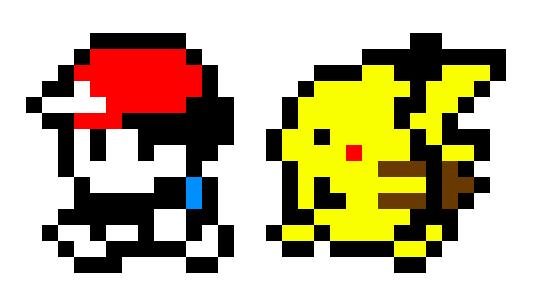

### **Prerequistes**

Let's get the Pokemon C.H.A.M.P.S. system set up with some library imports as well as loading our tournament data into a dataframe below.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt

data_file = 'data/tournaments.csv'
df = pd.read_csv(data_file, engine='python')

# Let's See the Superstar Cards

First, let's delve into the realm of superstar cards, those that bask in the limelight and command the most attention within the competitive decks. Our mission is to pinpoint the cards that not only make frequent appearances but also hold a high position in victorious decks. By checking out the cards that are in the decks that have clinched the most wins, we aim to identify the top 10 cards that stand out as true game-changers.

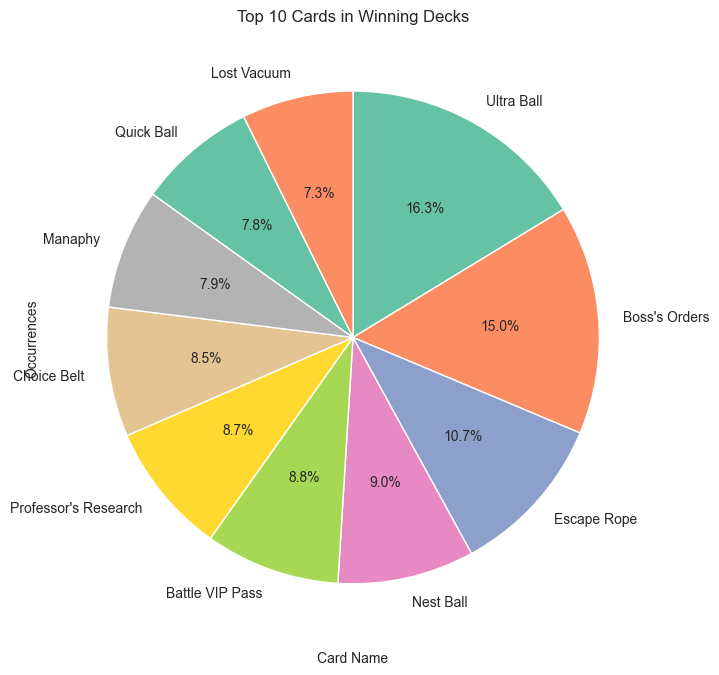

In [7]:
# Visualization #1 || Display the top 10 cards by occurrences in the terminal
card_occurrences = df['name_card'].value_counts()
top_cards = card_occurrences.head(10)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2')
plt.pie(top_cards, labels=top_cards.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('Top 10 Cards in Winning Decks')
plt.xlabel('Card Name')
plt.ylabel('Occurrences')

# Show Visualizations
plt.show()

# It's all about the money

Well we can see that two names reign supreme: the coveted Ultra Ball and the influential Boss's Orders.

However, the question arises: do these powerhouses come at a hefty price? To unravel this mystery, let's delve into the financial landscape of deck construction. Our mission is to uncover the **average cost of a deck by country**, shedding light on whether our competition is assembling a top-tier deck.

Text(0, 0.5, 'Average Cost')

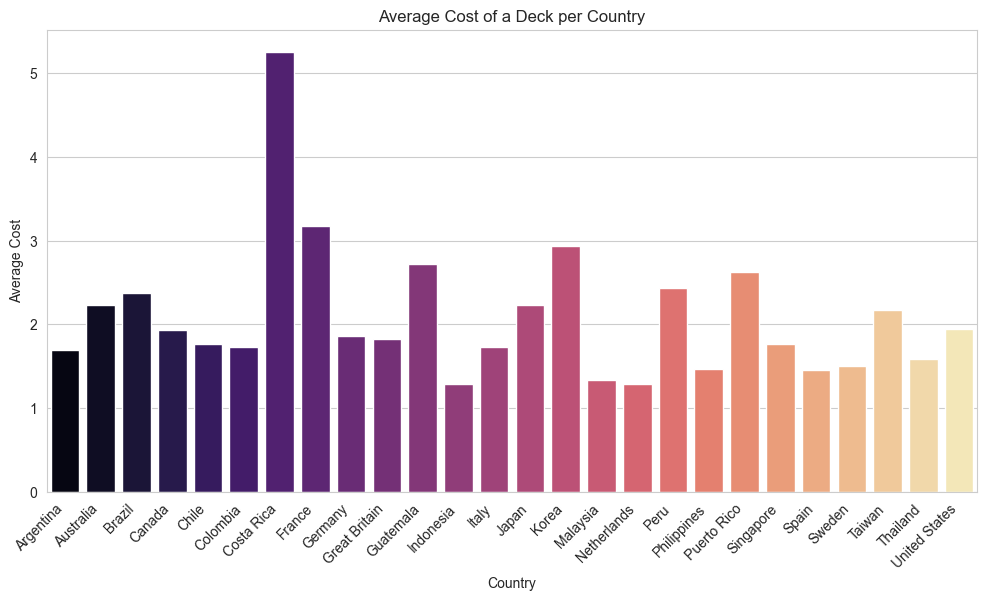

In [8]:
# Visualization #2 || Correlation Heatmap
df['price_card'] = pd.to_numeric(df['price_card'], errors='coerce')
average_cost_per_country = df.groupby('country_tournament')['price_card'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='country_tournament', hue='country_tournament', y='price_card', data=average_cost_per_country, palette='magma', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Average Cost of a Deck per Country')
plt.xlabel('Country')
plt.ylabel('Average Cost')

# Where In the World are CHAMPS Playing

Well, let's not get matched up against a Costa Rican! They must have some powerhouses sneaking into their decks. With that in mind, our next let's unravel the geographical tapestry of Pokémon TCG tournaments over the past 12 years. By mapping out the predominant locations where these intense battles have unfolded, we gain valuable insights into potential arenas that may shape our future gaming endeavors.

Text(0, 0.5, 'Number of Tournaments')

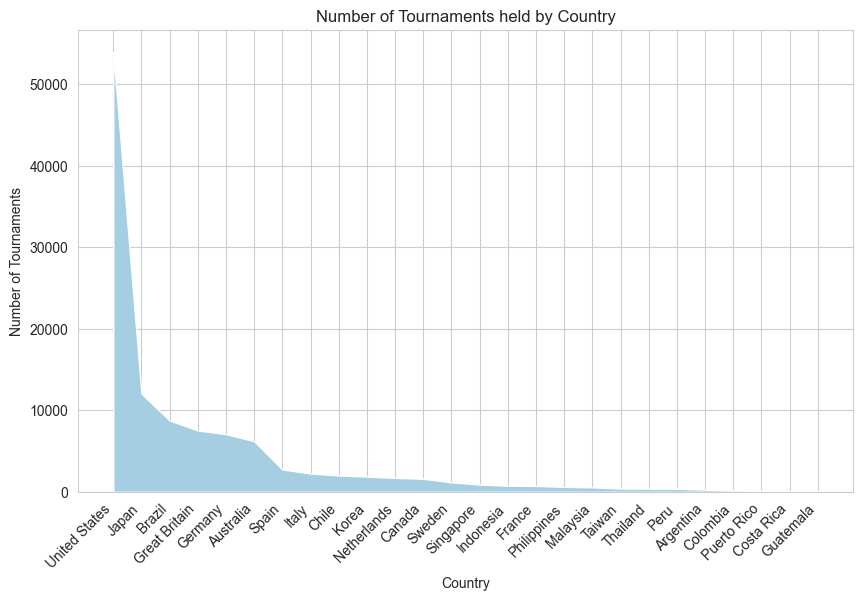

In [9]:
df['country_tournament'] = df['country_tournament']
region_counts = df['country_tournament'].value_counts(dropna=False)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Paired')
sns.set_style('whitegrid')
plt.stackplot(region_counts.index, region_counts.values, labels=region_counts.index, colors=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Tournaments held by Country')
plt.xlabel('Country')
plt.ylabel('Number of Tournaments')

# Model Time

### User Interaction Required
After the code in the cell below runs, I would like you to participate! You will be prompted to select a card to use as a test to evaluate the products functionality. Please enter a number 1 thru 10 from the list that the output displays below and hit 'Enter' in order for the code to execute successfully. Enjoy the result!

In [10]:
# Data Prep
data_file = 'data/tournaments.csv'
df = pd.read_csv(data_file, engine='python')

# Random Sample of Cards - Change the 'frac' value to increase or decrease the amount from the dataset.
# This was done in order to reduce the test_train_split execution time.
df_sampled = df.sample(frac=0.05, random_state=42)
print(f'Random sample of {df_sampled.shape[0]} cards added')

# Display 10 randomly selected card names
sampled_card_names = df_sampled['name_card'].sample(10).tolist()
print(f'Here are 10 randomly selected card names for you to choose:')
for i, card_name in enumerate(sampled_card_names, 1):
    print(f'{i}. {card_name}')

# Prompt user to input a card name
selected_card_index = int(input('Select a card by entering its corresponding number: '))
if 1 <= selected_card_index <= 10:
    new_card_name = sampled_card_names[selected_card_index - 1]
    print(f'You selected: {new_card_name}')

    card_counts = df_sampled['name_card'].value_counts()
    card_counts_df = pd.DataFrame({'Card Name': card_counts.index, 'Count': card_counts.values})
    print("Dataframe loaded...")

    df = pd.merge(df_sampled, card_counts_df, left_on='name_card', right_on='Card Name', how='left')

    # Create a binary column indicating whether a card is successful based on occurrences
    success_threshold = 10  # You can adjust this threshold
    df['success'] = (df['all_time_score'] > success_threshold).astype(int)
    # Features (X) and target variable (y)
    X = df[['name_card']]
    y = df['success']
    # Encode categorical features
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X[['name_card']])
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_encoded.toarray())
    print(f'Training data...')
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    print(f'Testing split...')
    # Initialize and train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print(f'Training classifier...')
    # Predict 'success' for the test set
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    print(f'Resolving accuracy of test data and prediction using Mean Squared Error: {int(mse * 100)}%\nAdditional information provided with Root Mean Squared Error: {int(rmse * 100)}%')

    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Overall accuracy of the model: {accuracy:.2%}')

    # Predict 'success' for the selected card
    new_card_encoded = encoder.transform([[new_card_name]])
    new_card_scaled = scaler.transform(new_card_encoded.toarray())
    prediction = model.predict(new_card_scaled)

    print(f'Chance of encountering another user using "{new_card_name}" is: {int(prediction[0] * 100)}%')

    y_proba = model.predict_proba(new_card_scaled)
    predicted_probability = y_proba[:, 1][0]

    print(f'Predicted probability of success for the card "{new_card_name}" against another opponent is: {predicted_probability:.2%}')
    
    threshold = 0.67

    if predicted_probability >= threshold:
        success_message = f'The card "{new_card_name}" has a high chance of success against opponents! 🌟'
    else:
        success_message = f'The card "{new_card_name}" may face challenges against opponents. 🤔'

    print(success_message)
else:
    print('Invalid selection. Please enter a number between 1 and 10.')


Random sample of 5715 cards added
Here are 10 randomly selected card names for you to choose:
1. N
2. Escape Rope
3. Arceus V
4. Radiant Greninja
5. Beedrill
6. Radiant Gardevoir
7. Escape Rope
8. Path to the Peak
9. Cresselia
10. Lost Vacuum


Select a card by entering its corresponding number:  6


You selected: Radiant Gardevoir
Dataframe loaded...
Training data...
Testing split...
Training classifier...
Resolving accuracy of test data and prediction using Mean Squared Error: 23%
Additional information provided with Root Mean Squared Error: 48%
Overall accuracy of the model: 76.64%
Chance of encountering another user using "Radiant Gardevoir" is: 100%
Predicted probability of success for the card "Radiant Gardevoir" against another opponent is: 63.79%
The card "Radiant Gardevoir" may face challenges against opponents. 🤔


C:\Program Files\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


# Towards a More Successful Future

Awesome! With all of this information gathered I'm sure that the Pokemon Tournament Training Club will be able to utilize the Pokemon CHAMPS system to create an environment of success!

Thank you for trying out the program.

--------------------
Ethan Harris

Student ID: 009582334

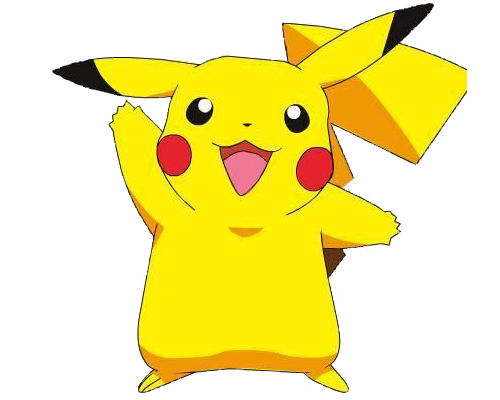